## Testing algorithms to decide if a number is prime

This notebook explores different algorithms to determine whether a given number is prime. We implement and test several approaches, including basic loops, counting divisors, and defining reusable functions. Each method is demonstrated with example numbers, and the results are printed for clarity. The notebook also includes explanations and step-by-step outputs to help understand how each algorithm works.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = 29

This algorithm checks if a given number `x` is prime by attempting to divide it by every integer from 2 up to half of `x`. If any of these numbers divides `x` evenly (i.e., with no remainder), the algorithm concludes that `x` is not a prime number and stops checking further. If none of the numbers divide `x`, it determines that `x` is a prime number. This approach is straightforward but not the most efficient, as it checks more numbers than necessary for larger values of `x`.

In [15]:

if x > 1:
    for i in range(2,int(x/2)+1):
        print(f"Checking if {x} is divisible by {i}...")
        if x % i == 0 :
            print(x,' is not a prime number')
            break
    else:
        print(x,' is a prime number')
else:
    print(x, 'is a prime number')

Checking if 29 is divisible by 2...
Checking if 29 is divisible by 3...
Checking if 29 is divisible by 4...
Checking if 29 is divisible by 5...
Checking if 29 is divisible by 6...
Checking if 29 is divisible by 7...
Checking if 29 is divisible by 8...
Checking if 29 is divisible by 9...
Checking if 29 is divisible by 10...
Checking if 29 is divisible by 11...
Checking if 29 is divisible by 12...
Checking if 29 is divisible by 13...
Checking if 29 is divisible by 14...
29  is a prime number


The algorithm described above is not efficient because it checks divisibility for every integer from 2 up to half of `x`. For large numbers, this results in many unnecessary checks, as a non-prime number will always have a factor less than or equal to its square root. More efficient algorithms only check up to the square root of the number, significantly reducing the number of iterations.

For further reading on prime-finding algorithms and optimizations, consider exploring:
- [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
- [Primality tests](https://en.wikipedia.org/wiki/Primality_test)
- [Miller–Rabin primality test](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test)
- [AKS primality test](https://en.wikipedia.org/wiki/AKS_primality_test)

These resources cover both basic and advanced methods for efficiently determining whether a number is prime.

Let's actually implement that below:

In [23]:
# Last alternative: Efficient prime check using square root

# Define the number to check
number_to_check = 29

# Assume the number is prime until proven otherwise
is_prime = True

# Only check divisors up to and including the square root of the number
for divisor in range(2, int(number_to_check ** 0.5) + 1):
    if number_to_check % divisor == 0:
        # Found a divisor, so the number is not prime
        is_prime = False
        break

# Output the result
if is_prime and number_to_check > 1:
    print(number_to_check, 'is prime')
else:
    print(number_to_check, 'is not prime')


29 is prime


## New Task: Checking Primality for All Numbers Up to N

Suppose we want to check whether every number up to a user-specified value `N` is prime. To accomplish this efficiently and avoid repeating code, we can use a **function**.

### What is a Function?

A function is a reusable block of code that performs a specific task. Functions allow us to organize our code, avoid repetition, and make our programs easier to read and maintain. By defining a function to check if a number is prime, we can call this function for each number from 2 up to `N`, rather than rewriting the primality check each time.

### Why Use a Function Here?

- **Reusability:** We can check any number for primality by calling the function with different arguments.
- **Clarity:** The logic for checking primality is contained in one place, making the code easier to understand.
- **Maintainability:** If we want to improve or fix our primality test, we only need to update the function, not every place where the check occurs.

In the next steps, we will define such a function and use it to check all numbers up to `N` for primality.

In [25]:
def is_prime_efficient(n):
    """
    Check if a number is prime using an efficient algorithm.

    This function returns True if 'n' is a prime number, and False otherwise.
    It uses the square root optimization: only checks divisibility up to sqrt(n).

    Parameters:
        n (int): The number to check for primality.

    Returns:
        bool: True if n is prime, False otherwise.
    """
    if n <= 1:
        return False
    for divisor in range(2, int(n ** 0.5) + 1):
        if n % divisor == 0:
            return False
    return True

# Example usage:
print(number_to_check, 'is prime' if is_prime_efficient(number_to_check) else 'is not prime')


29 is prime


### Understanding Function Attributes: Docstrings and More

In Python, functions can have several important attributes that help describe their purpose and usage:

- **Docstring:**  
    A docstring is a special string literal that appears right after the function definition. It describes what the function does, its parameters, and its return value. Docstrings are enclosed in triple quotes (`""" ... """`) and can be accessed using `function_name.__doc__`.  
    Example from above:
    ```python
    def is_prime_efficient(n):
            """
            Check if a number is prime using an efficient algorithm.

            This function returns True if 'n' is a prime number, and False otherwise.
            It uses the square root optimization: only checks divisibility up to sqrt(n).

            Parameters:
                    n (int): The number to check for primality.

            Returns:
                    bool: True if n is prime, False otherwise.
            """
            ...
    ```
    This docstring explains the function's purpose, parameters, and return value.

- **Function Name:**  
    The name you give a function (e.g., `is_prime_efficient`, `isPrime`) should be descriptive of its purpose.

- **Parameters:**  
    Functions can accept input values (parameters), which are listed in parentheses after the function name. For example, `n` in `is_prime_efficient(n)`.

- **Return Value:**  
    Functions can return a value using the `return` statement. This value can be used elsewhere in your code.

- **Printing vs. Returning:**  
    - `is_prime_efficient` returns a boolean value (`True` or `False`).
    - `isPrime` prints information during execution and also returns a boolean.


Docstrings are essential for documenting what a function does, making your code easier to understand and maintain. Always include a clear docstring for any function you define, especially if others will use your code or if you plan to revisit it later.

In [34]:
# Define N (you can change this value as needed)
N = 5000

# Find all primes up to N using the is_prime_efficient function
primes_up_to_N = []
for n in range(2, N + 1):
    if is_prime_efficient(n):
        primes_up_to_N.append(n)
print(f"Primes up to {N}:", primes_up_to_N)

Primes up to 5000: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1

/var/folders/5x/5xtm6r7126g41vdgwb462xp40000gn/T/ipykernel_91341/655901627.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(primes_up_to_N, [1]*len(primes_up_to_N), use_line_collection=True)


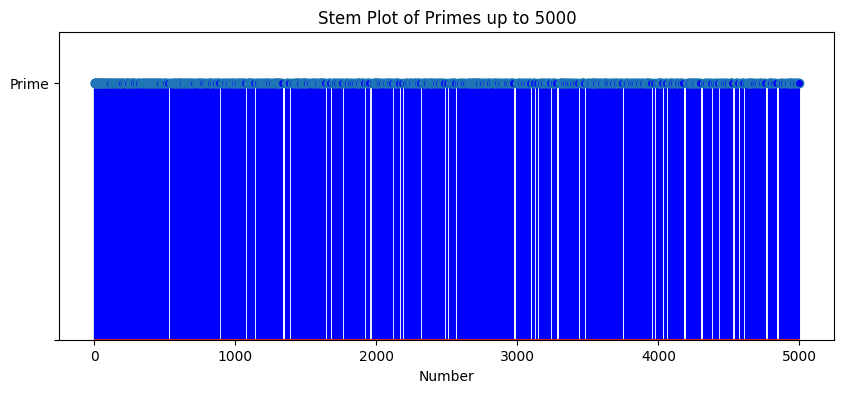

In [35]:
# Create a stem plot showing the positions of primes up to N
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(primes_up_to_N, [1]*len(primes_up_to_N), use_line_collection=True)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(stemlines, 'color', 'b')
plt.yticks([0, 1], ['', 'Prime'])
plt.xlabel('Number')
plt.title(f'Stem Plot of Primes up to {N}')
plt.ylim(0, 1.2)
plt.show()

## Summary of the Notebook

This notebook explored various algorithms for determining whether a number is prime. It began with a basic approach that checks divisibility up to half the number, then introduced a more efficient method that only checks up to the square root. The importance of using functions for code reuse and clarity was demonstrated by defining an efficient primality test function, `is_prime_efficient(n)`. This function was then used to find all prime numbers up to a user-defined value `N` (set to 5000), and the results were visualized using a stem plot.

### Key Learnings

- **Prime Checking Algorithms:**  
    Learned the difference between basic and optimized approaches for checking if a number is prime, and why checking up to the square root is more efficient.

- **Code Reusability with Functions:**  
    Saw how defining a function for primality testing makes the code cleaner, reusable, and easier to maintain.

- **Documentation with Docstrings:**  
    Understood the importance of documenting functions using docstrings for clarity and future reference.

- **Visualization:**  
    Used matplotlib to visualize the distribution of prime numbers up to 5000, providing insight into their occurrence.

- **Practical Application:**  
    Combined algorithmic thinking, function design, and data visualization to solve and illustrate a classic problem in number theory.